In [44]:
import numpy as np
import scipy
import librosa, librosa.display
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [45]:
PATH = 'external_media/Audio/'
FILE = 'voice_cris.wav'
wav = PATH+FILE

signal , sr = librosa.load(wav, duration=30)
ipd.Audio(signal, rate=sr)

Sampling rate: 22050
Audio length: 30.0 seconds
Lowest amplitude: 0.67421585
Highest amplitude: -0.40853038


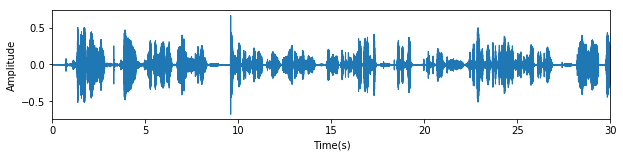

In [52]:
maxF = min(signal)
minF = max(signal)
duration = signal.size / sr
sample_rate = sr

print('Sampling rate:', sample_rate)
print('Audio length:', duration, 'seconds')
print('Lowest amplitude:', minF)
print('Highest amplitude:', maxF)

plt.figure(figsize=(10,2))
librosa.display.waveplot(signal, sr=sr)
plt.ylabel('Amplitude')
plt.xlabel('Time(s)')
plt.show()

In [64]:
pre_emphasis = 0.95 #  0.95 - 0.97
emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

In [65]:
print('Emphasized Signal')
ipd.Audio(emphasized_signal, rate=sr)

Emphasized Signal


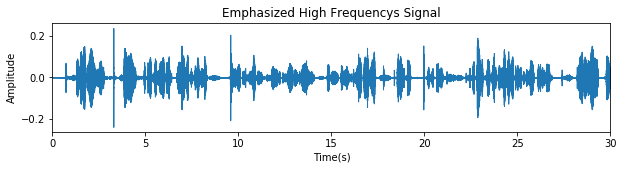

In [66]:
plt.figure(figsize=(10,2))
plt.title('Emphasized High Frequencys Signal')
librosa.display.waveplot(emphasized_signal, sr=sr)
plt.ylabel('Amplitude')
plt.xlabel('Time(s)')
plt.show()

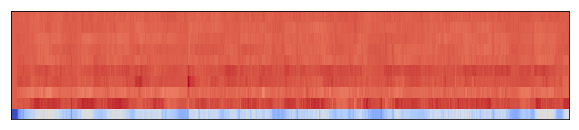

In [96]:
h, p = librosa.effects.hpss(emphasized_signal)
mfcc_h = librosa.feature.mfcc(h, sr=sr, n_mfcc=10)

fig = plt.figure(figsize=(10,2))
librosa.display.specshow(mfcc_h, sr=sr)
plt.show()
fig.savefig('external_media/Audio/MFCC_HARMONIC.png', transparent=True)

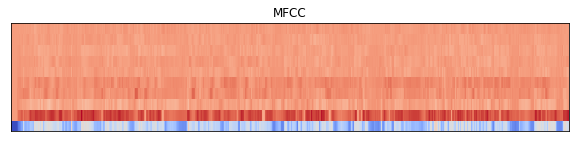

In [86]:
mfcc = librosa.feature.mfcc(signal, sr=sr, n_mfcc=10)
mfcc_scaled = np.mean(mfcc.T, axis = 0)

plt.figure(figsize=(10,2))
plt.title('MFCC')
librosa.display.specshow(mfcc, sr=sr)
plt.show()